## **Lesson 2:** A simple example of data analysis on Codespace
Congratulations team. Our commercial team has landed a potential customer, the City of Chicago, and they want us to analyze the crime data in the city. They have provided a dataset, and they want us to showcase our skills by giving a sneak peek of what we can understand from the data. As this is our first assignment, the management want everybody to take the task and create a repository with the code for the analysis.

### **Section 1:** Basic commands on the terminal

To make our work reproducible, we need an isolated environment to run our scripts. In Google Colab, you get an ephemeral virtual machine (with RAM and GB), where you can create notebooks and run scripts and even terminal commands. In Codespaces, you can spin up an ephemeral virtual machine (with RAM and GB) where you can sync your files with the repository. Let's learn some basic commands.

In [1]:
# View python version
!python --version

Python 3.12.1


In [2]:
# List installed packages
!pip freeze

asttokens==2.4.1
attrs==24.2.0
comm==0.2.2
contourpy==1.3.0
cycler==0.12.1
debugpy==1.8.7
decorator==5.1.1
executing==2.1.0
fastjsonschema==2.20.0
fonttools==4.54.1
ipykernel==6.29.5
ipython==8.29.0
jedi==0.19.1
jsonschema==4.23.0
jsonschema-specifications==2024.10.1
jupyter_client==8.6.3
jupyter_core==5.7.2
kiwisolver==1.4.7
matplotlib==3.9.2
matplotlib-inline==0.1.7
nbformat==5.10.4
nest-asyncio==1.6.0
numpy==2.1.2
packaging==24.1
pandas==2.2.3
parso==0.8.4
pexpect==4.9.0
pillow==11.0.0
platformdirs==4.3.6
prompt_toolkit==3.0.48
psutil==6.1.0
ptyprocess==0.7.0
pure_eval==0.2.3
Pygments==2.18.0
pyparsing==3.2.0
python-dateutil==2.9.0.post0
pytz==2024.2
pyzmq==26.2.0
referencing==0.35.1
rpds-py==0.20.0
six==1.16.0
stack-data==0.6.3
tornado==6.4.1
traitlets==5.14.3
tzdata==2024.2
wcwidth==0.2.13


In [3]:
# View current directory
!pwd

/workspaces/crimenes_chicago


In [4]:
# View current files
!ls

Lesson_2x.ipynb  README.md  data_crimes.csv  files.txt


In [5]:
# Create a file
!touch files.txt

In [6]:
# Add the file and then commit into the local repo

In [7]:
# Push the file into the remote repo

### **Section 2:** Let's dive into reading data

Download the following file from this url: https://data.cityofchicago.org/api/views/qnmj-8ku6/rows.csv?accessType=DOWNLOAD

It has records from the Crimes - 2001 to Present dataset for the 2014 year[1].

Please, answer the following questions:
1. How many crimes were reported in 2014?
2. How many crimes were reported in December 2014?
3. What are the top 5 crimes?
4. Which day has the most and less crimes?
5. Is there a trend in the crimes commited?

In [8]:
# Download the file using the terminal
!curl -o data_crimes.csv https://data.cityofchicago.org/api/views/qnmj-8ku6/rows.csv?accessType=DOWNLOAD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 62.3M    0 62.3M    0     0  1512k      0 --:--:--  0:00:42 --:--:-- 1675k


In [9]:
# Step 0. Load libraries and custom functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Step 1. Read data and get a quick view
# 1.1 Read the dataset
df_raw=pd.read_csv("data_crimes.csv")

In [11]:
# 1.2 Get a view
df_raw.sample(10)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
237196,9899480,HX549955,12/20/2014 08:00:00 AM,044XX S FAIRFIELD AVE,0820,THEFT,$500 AND UNDER,STREET,False,False,...,12.0,58,06,1158778.0,1875017.0,2014,02/10/2018 03:50:01 PM,41.812779,-87.693119,"(41.812778613, -87.693118953)"
274028,10312412,HY501192,10/01/2014 12:01:00 AM,014XX W ALBION AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,...,40.0,1,11,1165606.0,1943949.0,2014,02/10/2018 03:50:01 PM,42.001790,-87.666107,"(42.001790316, -87.666106904)"
74872,9463599,HX116338,01/15/2014 10:00:00 PM,092XX S COTTAGE GROVE AVE,0820,THEFT,$500 AND UNDER,STREET,False,False,...,9.0,44,06,1183173.0,1844063.0,2014,02/04/2016 06:33:39 AM,41.727304,-87.604600,"(41.727304299, -87.604600275)"
75347,9663585,HX311595,06/20/2014 11:00:00 AM,017XX W MONROE ST,0820,THEFT,$500 AND UNDER,STREET,False,False,...,27.0,28,06,1165034.0,1899606.0,2014,02/10/2018 03:50:01 PM,41.880123,-87.669475,"(41.880123043, -87.669474562)"
124049,9631038,HX281894,05/29/2014 11:00:00 PM,005XX W ROOSEVELT RD,0460,BATTERY,SIMPLE,SMALL RETAIL STORE,False,False,...,2.0,28,08B,1173209.0,1894980.0,2014,02/10/2018 03:50:01 PM,41.867252,-87.639594,"(41.867251542, -87.639594427)"
50479,9499500,HX154596,02/17/2014 04:00:00 PM,048XX N FRANCISCO AVE,0530,ASSAULT,AGGRAVATED: OTHER DANG WEAPON,OTHER,False,False,...,40.0,4,04A,1156348.0,1932071.0,2014,02/04/2016 06:33:39 AM,41.969389,-87.700489,"(41.96938944, -87.700488807)"
172669,9900703,HX551280,12/20/2014 01:00:00 PM,083XX S STEWART AVE,0820,THEFT,$500 AND UNDER,DEPARTMENT STORE,False,False,...,21.0,44,06,1175078.0,1849610.0,2014,02/10/2018 03:50:01 PM,41.742710,-87.634088,"(41.742710224, -87.634088181)"
62876,9510716,HX165801,02/26/2014 09:00:00 PM,064XX W IRVING PARK RD,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,True,False,...,38.0,17,06,1132626.0,1925898.0,2014,02/04/2016 06:33:39 AM,41.952898,-87.787861,"(41.952897791, -87.787860507)"
244001,9720720,HX370507,08/02/2014 04:18:00 AM,001XX N CICERO AVE,502R,OTHER OFFENSE,VEHICLE TITLE/REG OFFENSE,STREET,True,False,...,28.0,25,26,1144365.0,1900264.0,2014,02/10/2018 03:50:01 PM,41.882342,-87.745353,"(41.88234232, -87.745352749)"
39723,9633498,HX284772,06/01/2014 01:20:00 AM,017XX W GRAND AVE,1305,CRIMINAL DAMAGE,CRIMINAL DEFACEMENT,PARKING LOT/GARAGE(NON.RESID.),True,False,...,26.0,24,14,1164460.0,1903534.0,2014,02/10/2018 03:50:01 PM,41.890914,-87.671471,"(41.890913953, -87.671470975)"


In [12]:
# 1.3 Get info
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275854 entries, 0 to 275853
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    275854 non-null  int64  
 1   Case Number           275854 non-null  object 
 2   Date                  275854 non-null  object 
 3   Block                 275854 non-null  object 
 4   IUCR                  275854 non-null  object 
 5   Primary Type          275854 non-null  object 
 6   Description           275854 non-null  object 
 7   Location Description  275443 non-null  object 
 8   Arrest                275854 non-null  bool   
 9   Domestic              275854 non-null  bool   
 10  Beat                  275854 non-null  int64  
 11  District              275854 non-null  int64  
 12  Ward                  275852 non-null  float64
 13  Community Area        275854 non-null  int64  
 14  FBI Code              275854 non-null  object 
 15  

In [13]:
# 1.4 Let's make some transformations
df=df_raw.copy()
df['Date'] = pd.to_datetime(df['Date'])
df['Updated On'] = pd.to_datetime(df['Updated On'])

/tmp/ipykernel_2939/722544445.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])
/tmp/ipykernel_2939/722544445.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Updated On'] = pd.to_datetime(df['Updated On'])


In [14]:
# 1.4.1 Visualize the transformations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275854 entries, 0 to 275853
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID                    275854 non-null  int64         
 1   Case Number           275854 non-null  object        
 2   Date                  275854 non-null  datetime64[ns]
 3   Block                 275854 non-null  object        
 4   IUCR                  275854 non-null  object        
 5   Primary Type          275854 non-null  object        
 6   Description           275854 non-null  object        
 7   Location Description  275443 non-null  object        
 8   Arrest                275854 non-null  bool          
 9   Domestic              275854 non-null  bool          
 10  Beat                  275854 non-null  int64         
 11  District              275854 non-null  int64         
 12  Ward                  275852 non-null  float64       
 13 

In [15]:
# 1.5 How many single values are in our categorical variables?
my_list = ['Block', 'Primary Type', 'Description', 'FBI Code', 'Community Area', 'Location Description', 'Ward', 'IUCR']


In [16]:
# 1.6 Let's create our categorical variables
df[my_list] = df[my_list].astype('category')
df.describe(exclude=[np.number, np.datetime64])

,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Ward,Community Area,FBI Code,Location
count,275854,275854,275854,275854,275854,275443,275854,275854,275852.0,275854,275854,273779
unique,275846,27539,329,34,333,135,2,2,50.0,77,26,138531
top,HX119907,001XX N STATE ST,0820,THEFT,$500 AND UNDER,STREET,False,False,28.0,25,06,"(41.883500187, -87.627876698)"
freq,2,773,28868,61568,28868,63085,196196,228331,14559.0,18821,61568,458


Let's agree to a coding convention. We'll make our columns a single word, in lower case. For example our column `Case Number` will be `case_number`

In [17]:
# 1.7 Let's convert our columns then
df.columns = df.columns.str.strip().str.lower().str.replace(' ','_')
df.columns

Index(['id', 'case_number', 'date', 'block', 'iucr', 'primary_type',
       'description', 'location_description', 'arrest', 'domestic', 'beat',
       'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate',
       'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude',
       'location'],
      dtype='object')

Now let me bring a new concept to the table: Tidy Data.

Tidy data is a standard way of mapping the meaning of a dataset to its structure. A dataset is messy or tidy depending on how rows, columns and tables are matched up with observations, variables and types. In tidy data:

- Every column is a variable.

- Every row is an observation.

- Every cell is a single value.

Tidy data makes it easy for an analyst or a computer to extract needed variables because it provides a standard way of structuring a dataset. Compare the different versions of the classroom data: in the messy version you need to use different strategies to extract different variables. This slows analysis and invites errors. If you consider how many data analysis operations involve all of the values in a variable (every aggregation function), you can see how important it is to extract these values in a simple, standard way. [2]

In [18]:
# 1.8 Now let's tidy up our dataset
df = df.drop('location', axis=1)

In [20]:
# 1.8.1 Show information of our transformed dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275854 entries, 0 to 275853
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    275854 non-null  int64         
 1   case_number           275854 non-null  object        
 2   date                  275854 non-null  datetime64[ns]
 3   block                 275854 non-null  category      
 4   iucr                  275854 non-null  category      
 5   primary_type          275854 non-null  category      
 6   description           275854 non-null  category      
 7   location_description  275443 non-null  category      
 8   arrest                275854 non-null  bool          
 9   domestic              275854 non-null  bool          
 10  beat                  275854 non-null  int64         
 11  district              275854 non-null  int64         
 12  ward                  275852 non-null  category      
 13 

Now we are ready to answer questions!

In [21]:
df.describe()

,id,date,beat,district,x_coordinate,y_coordinate,year,updated_on,latitude,longitude
count,2.758540e+05,275854,275854.000000,275854.000000,2.737790e+05,2.737790e+05,275854.0,275854,273779.000000,273779.000000
mean,9.683655e+06,2014-07-04 18:44:01.499151872,1142.639063,11.197688,1.164356e+06,1.885349e+06,2014.0,2017-10-22 21:43:46.221736704,41.840996,-87.672406
min,2.121200e+04,2014-01-01 00:00:00,111.000000,1.000000,0.000000e+00,0.000000e+00,2014.0,2015-08-17 15:03:40,36.619446,-91.686566
25%,9.575161e+06,2014-04-12 02:00:00,612.000000,6.000000,1.152356e+06,1.858518e+06,2014.0,2018-02-10 15:50:01,41.766999,-87.716063
50%,9.690231e+06,2014-07-05 19:45:00,1023.000000,10.000000,1.165899e+06,1.891103e+06,2014.0,2018-02-10 15:50:01,41.856790,-87.666507
75%,9.803732e+06,2014-09-27 03:00:00,1651.000000,16.000000,1.176364e+06,1.908316e+06,2014.0,2018-02-10 15:50:01,41.903997,-87.628093
max,1.363890e+07,2014-12-31 23:58:00,2535.000000,31.000000,1.205119e+06,1.951507e+06,2014.0,2024-10-23 15:41:22,42.022537,-87.524533
std,4.292573e+05,NaN,688.960304,6.882167,1.729162e+04,3.231096e+04,0.0,NaN,0.088908,0.062668


Total cases:275854
In december 214: 20414


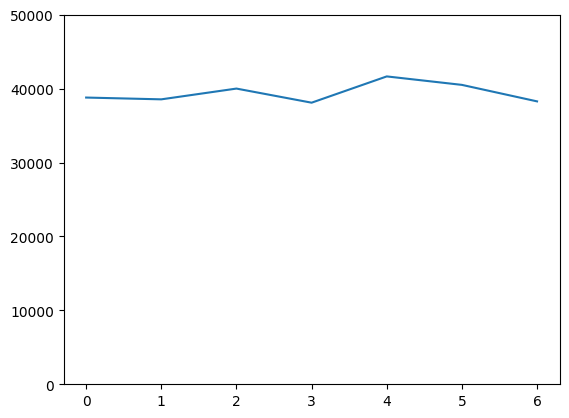

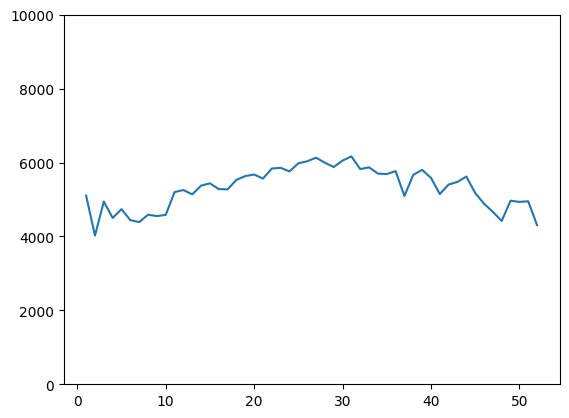

In [33]:
# 2. Data analysis
# 2.1 How many crimes were reported in 2014?
print(f'Total cases:{len(df)}')
# 2.2 How many crimes were reported in December 2014?
mask = (df['date']>= '2014-12-01') & (df['date']<= '2014-12-31')
print(f'In december 214: {len(df[mask])}')
# 2.3 What are the top 5 crimes?
df['primary_type'].value_counts().nlargest(5)
# 2.4 Which day has the most and less crimes?
by_day = df['date'].groupby(df['date'].dt.dayofweek).count()
plt.plot(by_day)
plt.ylim([0,50000])
plt.show()
# 2.5 Is there a trend in the crimes commited?
by_week = df['date'].groupby(df['date'].dt.isocalendar().week).count()
plt.plot(by_week)
plt.ylim([0,10000])
plt.show()

## References
[1] Chicago Data Portal. (August 27, 2024). *Crimes 2001-to date*, downloaded from https://data.cityofchicago.org/api/views/qnmj-8ku6/rows.csv?accessType=DOWNLOAD  
[2] Hadley Wickham and Garrett Grolemund. (Aug 27. 2024). *R for Data Science*, downloaded from https://r4ds.had.co.nz/tidy-data.html